## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

## Info on the Dataset 

##### Number of Instances
There are 750 data records.  360 are from the first quarter of the year (Jan to Mar)
390 are from the second quarter of the year (Apr to Jun).

###### Number of Attributes
There are 16 attributes. 

For each Attribute
* quarter:  the yearly quarter (1=Jan-Mar; 2=Apr-Jun)
* stock: the stock symbol (see below)
* date: the last business day of the work (this is typically a Friday)
* open: the price of the stock at the beginning of the week
* high: the highest price of the stock during the week
* low: the lowest price of the stock during the week
* close: the price of the stock at the end of the week
* volume: the number of shares of stock that traded hands in the week
* percent_change_price: the percentage change in price throughout the week
* percent_change_volume_over_last_week: the percentage change in the number of shares of stock that traded hands for this week compared to the previous week
* previous_weeks_volume: the number of shares of stock that traded hands in the previous week
* next_weeks_open: the opening price of the stock in the following week
* next_weeks_close: the closing price of the stock in the following week
* percent_change_next_weeks_price: the percentage change in price of the stock in the 
* following week days_to_next_dividend: the number of days until the next dividend
* percent_return_next_dividend: the percentage of return on the next dividend


List of stocks in the dataset:
* 3M		 	MMM
* American Express 	AXP
* Alcoa			AA
* AT&T 			T
* Bank of America		BAC
* Boeing 		 	BA
* Caterpillar 	 	CAT
* Chevron 	 	CVX
* Cisco Systems 		CSCO
* Coca-Cola 	 	KO
* DuPont 		 	DD
* ExxonMobil 	 	XOM
* General Electric 	GE
* Hewlett-Packard		HPQ
* The Home Depot 	 	HD
* Intel 		 	INTC
* IBM 		 	IBM
* Johnson & Johnson 	JNJ	
* JPMorgan Chase 	 	JPM
* Kraft			KRFT
* McDonald's 		MCD
* Merck 		 	MRK
* Microsoft 	 	MSFT
* Pfizer 		 	PFE
* Procter & Gamble 	PG
* Travelers 	 	TRV
* United Technologies 	UTX
* Verizon 	 	VZ
* Wal-Mart 	 	WMT
* Walt Disney 	 	DIS




## Business Analysis

-----
The Dow Jones, is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States. All the companies listed above and on the dataset, belonged to the index in 2011.

The dataset contains the weekly results during the 2 first quarters of the year. Generally speaking, the dataset shows price, volume and the relative changes of these two variables. Besides data on the present week, it has rows with values for the next week, which can be useful on a ML approach. It also has two columns on dividend distribution.

I should expect interesting changes between quarters, because at the end of each quarter, the companies announce their results. 

-----


## Data Understanding

In [52]:
#add here your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mplfinance as mpl
import ta

import warnings
warnings.filterwarnings('ignore')

##### Functions

In [53]:
#Function that calculates the moving average, bollinger bands, distance between close and low bollinger band, and distance between bollinger bands
def divide_and_conquer(data):
    #Divide dataset into list of dataframes
    list_stocks=[data[data['stock']==name]for name in list(data['stock'].unique())]
    for df in list_stocks:
        indicator_bb=ta.volatility.BollingerBands(close=df["close"], n=3, ndev=2) #Bollinger Bands
        indicator_rsi=ta.momentum.RSIIndicator(close=df['close'],n=3) #RSI
        #Add new columns
        df['mv_avg']= indicator_bb.bollinger_mavg()
        df['top_band']=indicator_bb.bollinger_hband()
        df['low_band']=indicator_bb.bollinger_lband()
        df['distance']=df['close']-df['low_band']
        df['distance_bet_bands'] = df['top_band']-df['low_band']
        df['rsi']=indicator_rsi.rsi()
    return list_stocks

#Function to get graph with MVA and Bollinger Bands
def get_graph(data,stock):
    fig, axs = plt.subplots(2,figsize=(12,7))
    #Plot
    axs[0].plot(data[data['stock']==stock]['date'],data[data['stock']==stock]['top_band'],label='top band')
    axs[0].plot(data[data['stock']==stock]['date'],data[data['stock']==stock]['low_band'],label='low band')
    axs[0].plot(data[data['stock']==stock]['date'],data[data['stock']==stock]['mv_avg'],label='mva')
    axs[1].plot(data[data['stock']==stock]['date'],data[data['stock']==stock]['rsi'],label="rsi")
    #Add legend
    axs[0].legend(loc="upper right")
    axs[1].legend(loc="upper right")
    #Add Title
    axs[0].set_title(f'{stock} 3-week MVA and BB\'s')
    axs[1].set_title('RSI')
    plt.show()
    
#Function to apply conditions on label
def classifier_label(ls,ground,up_limit):
    v=[]
    for value in ls:
        if (value >= ground) & (value < up_limit):
            x=1
            v.append(x)
        elif (value < ground) & (value > -up_limit):
            x=2
            v.append(x)
        elif (value >= up_limit):
            x=3
            v.append(x)
        else:
            x=4
            v.append(x)
    return v

In [54]:
#add here your data understanting code
data=pd.read_csv('data\dow_jones_index.data')
data.head(10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [55]:
data.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [56]:
data.shape

(750, 16)

In [57]:
#Get columns type Object
str_cols=[i for i in range(len([value for value in data.dtypes])) if [value for value in data.dtypes][i] == 'O']
#Get names of columns type Object
name_str_cols=[data.columns[value] for value in str_cols]
#Get columns that have dollar sign on it
dollar_cols=[name for name in name_str_cols if '$' in data[name].values[0]]
#Transform strings with dollar signs into floats
data[dollar_cols] = data[dollar_cols].replace('[\$,]', '', regex=True).astype(float)
#Convert values in column 'date' from datetime to string
data['date'] = pd.to_datetime(data['date'])
#Add week column
data['week']=[date.isocalendar()[1] for date in data['date']]

In [58]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,week
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704,1
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,2
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,3
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,4
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,5


### Feature engineering

To construct my model, I decided to engineer two financial indicators that are frequently used by financial experts. The combination of these indicators is tipically used when deciding on an entry point on the market, which is exactly what our client wants to find out. The two financial indicators are explained below:

* Distance between Bollinger Bands 

Bollinger bands are a volatility indicator. They consist of a simple moving average, and 2 lines plotted at 2 standard deviations on either side of the central moving average line. The outer lines make up the band.
Simply, when the band is narrow the market is quiet. When the band is wide the market is loud.

* Relative Strength Index (RSI) 

This is a momentum indicator plotted on a separate scale. There’s a single line scaled from 0 to 100 that identifies overbought and oversold conditions in the market. Readings over 70 indicate an overbought market, and readings below 30 indicate an oversold market.

**A bollinger band squeeze together with an RSI below 30 is a very strong indicator that the market is about to go up and you should buy.**

Source:https://medium.com/@harrynicholls/7-popular-technical-indicators-and-how-to-use-them-to-increase-your-trading-profits-7f13ffeb8d05

I used a Python library (ta) to calculate the moving average on a 3-week period, the bollinger bands and the RSI. The distance between bollinger bands was calculated subtracting the bottom band to the top band. Below there is an example of a plot on of the stocks on the dataset.

In [59]:
#Apply divide_and_conquer to dataset, to calculate financial indicators for each stock
df=pd.concat(divide_and_conquer(data))

In [60]:
#New features created
df[[name for name in df.columns if name not in data.columns]].head()

,mv_avg,top_band,low_band,distance,distance_bet_bands,rsi
0,16.420000,16.420000,16.420000,0.000000,0.000000,100.000000
1,16.195000,16.645000,15.745000,0.225000,0.900000,0.000000
2,16.060000,16.589906,15.530094,0.259906,1.059811,0.000000
3,15.963333,16.241102,15.685564,0.444436,0.555538,51.515152
4,16.353333,17.499961,15.206705,1.933295,2.293256,85.287356


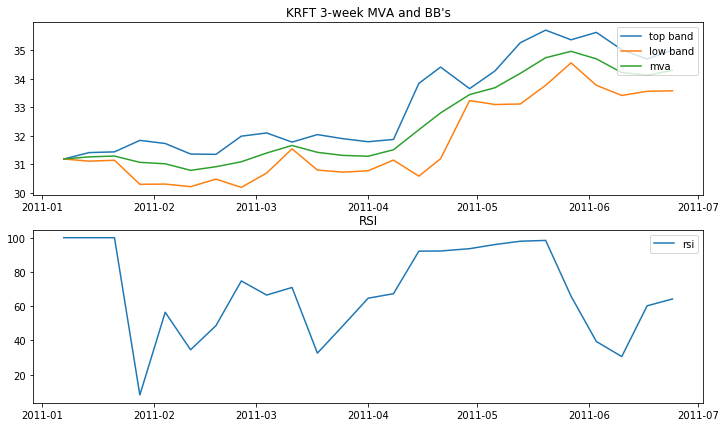

In [61]:
#Example
get_graph(df,'KRFT')

### What will be my features and my label?

Considering that the client has 100€ to invest in a single company each week, it would be valuable if we could predict te next week's price behaviour. The feature that represents the best the price variations on a week is the 'percent_change_on_price'. 
As the 'percent_change_on_price' increases, the difference between the closing price and opening price increases and the client profits. If the 'percentage_change_on_price' is negative, the client will lose money.

So, since I want to predict if next week is gonna be positive for each one of the companies, my LABEL will be the column 'percentage_change_next_weeks_price'. Features like 'next_weeks_open' and 'next_weeks_close' become obsolete. This features would be unknown in real life and it doesn't make sense to use features related to next week to predict next week's price. 

The dataset has 30 different stocks, with 25 entries for each stock. To construct a model using the 750 data points, I cannot use absolute variables like opening price or closing price, because the ranges of these variables are different for each stock. So, I will only use relative variables as features. Also, the name of the stock is irrelevant for the model.

Heatmap and Pairplot analysis:

* The graphs show no relevant relation between dividend features and percent_change_price';
* Close to 0 correlation between dividend features and 'percent_change_price';
* Significant correlation between percent_change_price and RSI;
* No colinearity between features;
* The price features and the volume are right-skewed;
* The distribution of 'percent_change_price' is similar to a normal distribution;

Since I see no relevant relation between dividends and the changes on price, I will drop the dividend columns.

By common knowledge, I believe that the column 'quarter' is important for the model and I'm going to use it. At the end of each quarter, the companies publish their results, which could influence the investment behavior of the investors during the next quarter. For now, I'm keeping the week column just for orientation purposes, but it will not be used in the model.

In [63]:
#List with desired features for modelling
features=['quarter','week','percent_change_price','percent_change_volume_over_last_wk','percent_change_next_weeks_price','distance_bet_bands','rsi',]
#List of features to drop
features_to_drop = np.setdiff1d(list(df.columns),features)
#Drop features_to_drop
df.drop(features_to_drop,axis=1,inplace=True)

In [64]:
df.head()

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,week,distance_bet_bands,rsi
0,1,3.79267,NaN,-4.428490,1,0.000000,100.000000
1,1,-4.42849,1.380223,-2.470660,2,0.900000,0.000000
2,1,-2.47066,-43.024959,1.638310,3,1.059811,0.000000
3,1,1.63831,9.355500,5.933250,4,0.555538,51.515152
4,1,5.93325,1.987452,0.230814,5,2.293256,85.287356


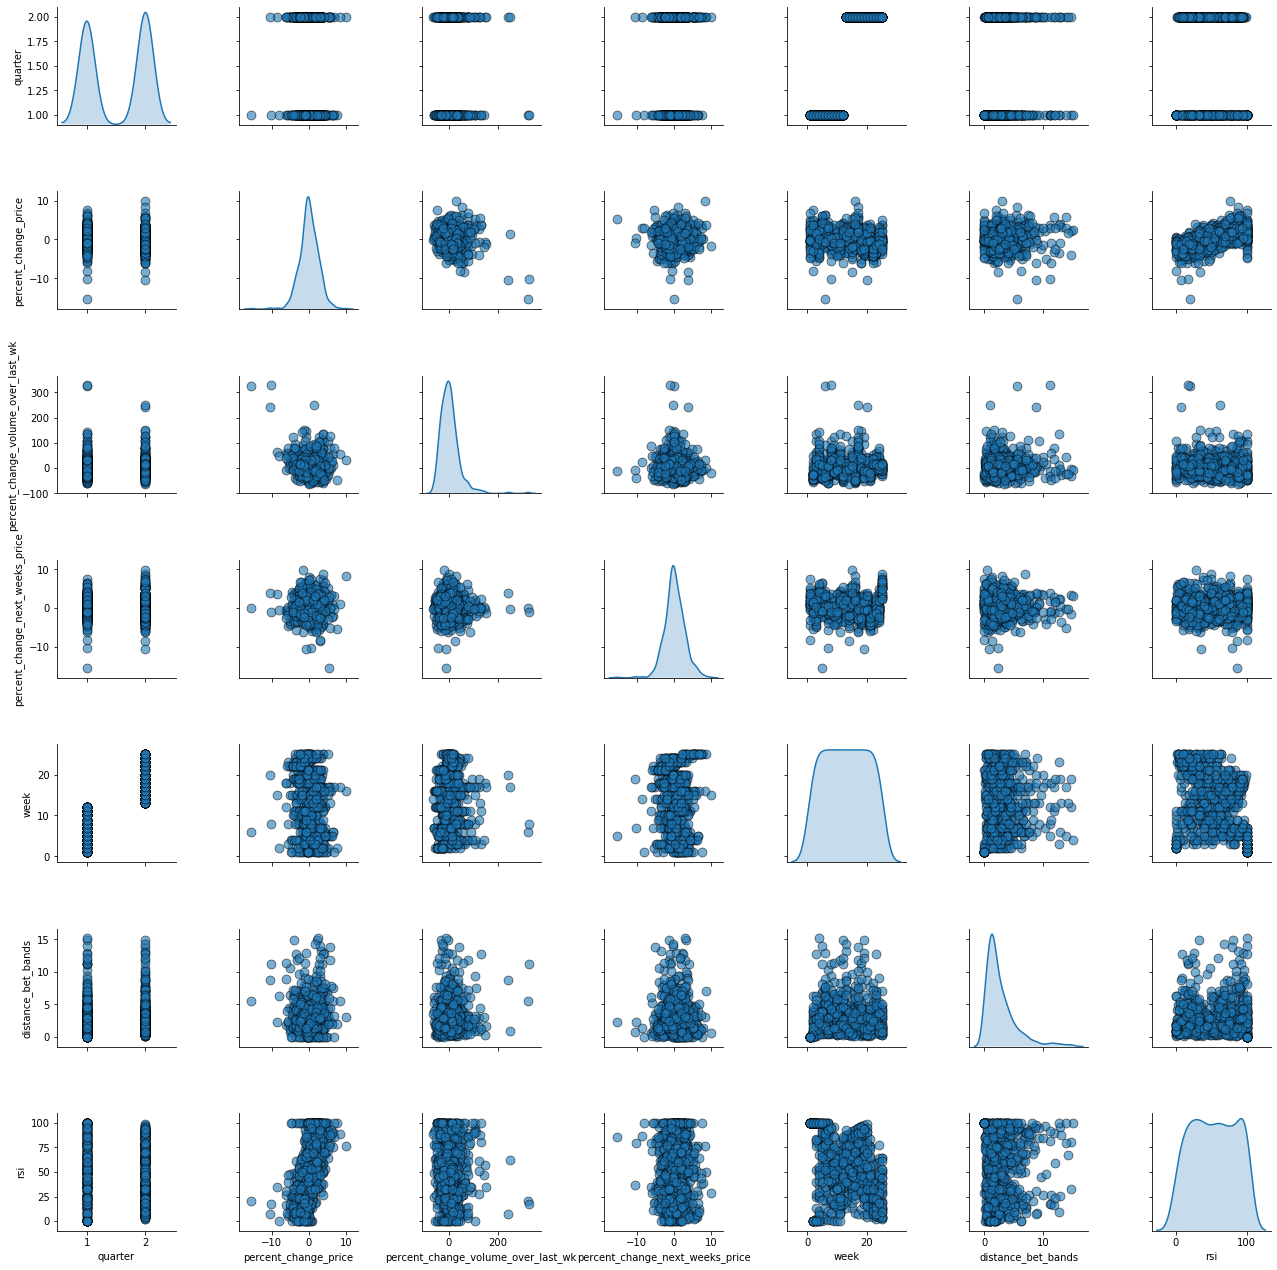

In [65]:
sns.pairplot(df, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

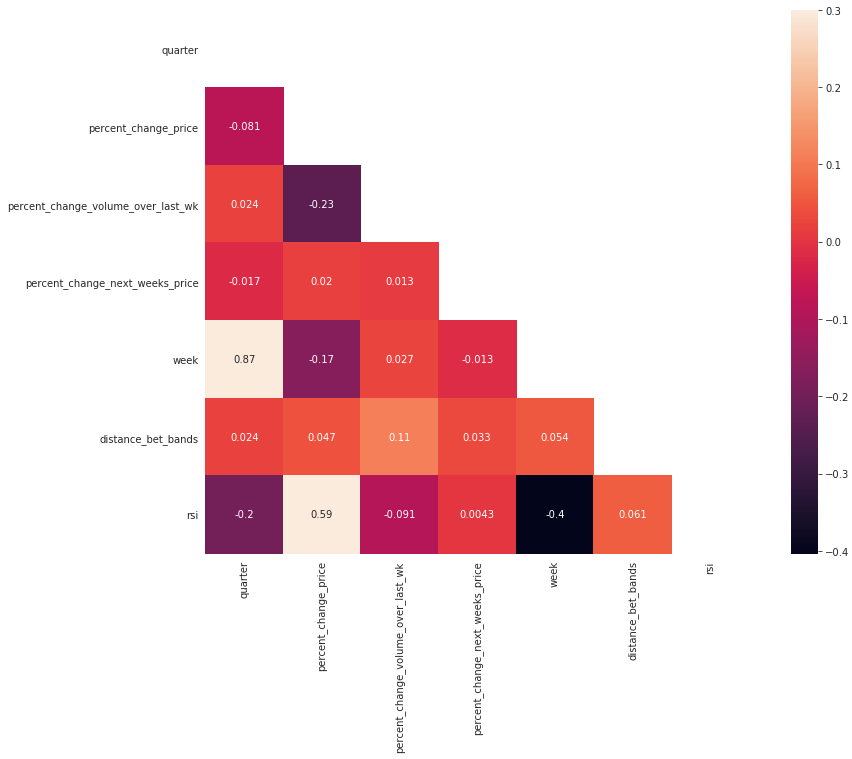

In [66]:
#Correlation Analysis
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

In [70]:
df['percent_change_price'].describe()

count    750.000000
mean       0.050262
std        2.517809
min      -15.422900
25%       -1.288053
50%        0.000000
75%        1.650888
max        9.882230
Name: percent_change_price, dtype: float64

In [71]:
mu, sigma = 0.050262, 2.517809 # mean and standard deviation
s = np.random.normal(mu, sigma, 750)

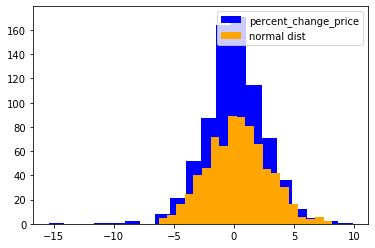

In [76]:
# Plot percent_change_price distribution
plt.hist(df['percent_change_price'],bins=20,color='blue', label='percent_change_price')
plt.hist(s,bins=20,color='orange',label='normal dist')
plt.legend(loc='upper right')
plt.show()

The normal distribution is lower and thiner. Percent_change_distribution looks more like a log-normal distribution.

### Is the dataset ready for the prediction task? (ex: missing values)

The moving average is calculated on a 3-week period. That means that you can only calculate effectively the MVA on the 4th week. Since the Bollinger Bands are based on the MVA, the rows from the first three weeks from each quarter have incorrect values. To solve that issue, all the rows from the first three weeks will be dropped.

Dropping the first three weeks rows will imply dropping the rows with null values as well.

In [85]:
#Select rows from the first weeks
to_be_dropped=df[(df['week']==1) | (df['week']==2) | (df['week']==3)]
#Dropping rows of the begginning of the quarter
df.drop(list(to_be_dropped.index),inplace=True)
#Resetting index
df.reset_index(inplace=True,drop=True)

In [86]:
df.shape

(660, 7)

In [87]:
df.describe()

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,week,distance_bet_bands,rsi
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1.590909,-0.034358,6.458749,0.230895,14.500000,2.972363,50.267710
std,0.492039,2.498310,40.612730,2.701187,6.349101,2.654969,28.296947
min,1.000000,-15.422900,-61.433175,-15.422900,4.000000,0.037712,0.000000
25%,1.000000,-1.402635,-18.262492,-1.225278,9.000000,1.228331,26.186744
50%,2.000000,-0.068168,1.117281,0.035998,14.500000,2.058658,49.360850
75%,2.000000,1.615980,21.800622,1.875245,20.000000,3.854326,75.348113
max,2.000000,9.882230,327.408924,9.882230,25.000000,15.134255,100.000000


In [88]:
#Get rows that contain null values
null_data = df[df.isnull().any(axis=1)]
null_data

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,week,distance_bet_bands,rsi


Proof that there are no null values.

Regarding outliers, there are about 13 outliers in the column 'percent_change_price'. Interestingly, the same rows that are outliers for price change are also outliers for volume change. As they are related to unusual/unexpected and non-frequent company behavior, I believe that they will result as unecessary noise for the model, and so, I will remove them from the dataset.

In [93]:
Q1 = df['percent_change_price'].quantile(0.25)
Q3 = df['percent_change_price'].quantile(0.75)
IQR = Q3 - Q1
outliers_pcp=df[(df['percent_change_price'] < (Q1 - 1.5 * IQR)) | (df['percent_change_price'] > (Q3 + 1.5 * IQR))]
outliers_pcp

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,week,distance_bet_bands,rsi
11,2,-8.52713,64.860721,3.728610,15,2.334286,34.500497
24,1,6.34668,10.747183,-1.917280,6,5.487537,75.848286
74,1,-6.05634,-9.427520,-0.372578,12,1.731897,16.216077
112,1,-15.42290,323.282152,0.053079,6,5.569728,20.248458
146,2,-6.02850,60.439140,-0.832930,18,11.338211,26.939578
178,1,6.39706,56.900576,0.856680,6,7.488444,90.508586
194,2,-6.01432,50.554678,-1.735580,22,4.016499,7.795771
246,1,-10.27960,327.408924,-1.045050,8,11.266675,17.659728
258,2,-10.49750,242.564104,3.878580,20,8.754813,7.191245
298,2,9.88223,30.770648,8.329430,16,3.002399,76.873234


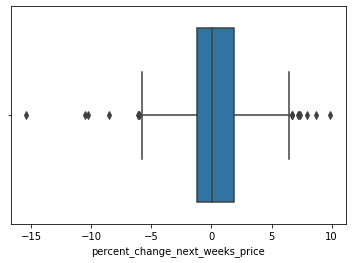

In [136]:
sns.boxplot(df['percent_change_next_weeks_price'])

In [95]:
outliers_pcp.shape

(13, 7)

In [96]:
#Dropping rows that are outliers
df.drop(list(outliers_pcp.index),inplace=True)
#Resetting index
df.reset_index(inplace=True,drop=True)

In [97]:
df.shape

(647, 7)

The week column is not further necessary.

In [98]:
df.drop('week',axis=1,inplace=True)

## Modelling

**I decided to use supervised classification algorithms to predict the price change.** 

My first approach was to classify next week's price change using four different categories:

* Label = 1 : Between 0% and 2% 
* Label = 2 : Between 0% and -2% 
* Label = 3 : Higher than 2%
* Label = 4 : Lower than -2% 

As you you will see on the end of this section, the results on this strategy weren't good. So, I tried another approach and simplified the model by dividing the label in two categories: 

* Label = 1 : Higher than 0%  
* Label = 0 : Lower than 0%

To evaluate my models I used accuracy and precision. In my understanding, precision is more important than recall in this use case because the cost of being wrong in a positive prediction is particularly high.

The 3 algorithms where I got the best results were the KNN Classifier, the SVM Classifier and a Decision Tree Classifier. The first two algorithms are based on distances and work well with a low number of dimensions. Also, as the result will show, the number of different label classifications is important on this kind of algorithms. Decision trees are a useful method for classification because they can easily model non-linear relationships, and are not easily influenced by extreme data points.

In [100]:
df.head()

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,distance_bet_bands,rsi
0,1,1.638310,9.355500,5.933250,0.555538,51.515152
1,1,5.933250,1.987452,0.230814,2.293256,85.287356
2,1,0.230814,-25.712195,-0.632547,2.154314,88.115135
3,1,-0.632547,-30.226696,-1.766780,0.378535,79.182311
4,1,-1.766780,66.177694,-1.368230,1.225071,39.320489


* Is the dataset balanced?

In [102]:
#Check dataset balance
rows_positive=df[df['percent_change_next_weeks_price']>0].shape[0]
total_rows=df.shape[0]
balance=round((rows_positive/total_rows)*100,2)
print (f'{balance} % of positive values')

50.39 % of positive values


#### Classification

In [115]:
#imports

#pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score

* Why use MinMaxScaler? 

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. All the features are on the same relative scale and the relative spaces between each feature’s values are mantained.

StandardScaler would change the distribution of my features to a normal distribution and Robust Scaler would reduce the influence of the points far of the mean. 

* Data split

I tested different splits on train and test data, but the best results occured with 80-20 ratio between training data and test data.

* Hyperparameter Tuning

I decided to use GridSearch to perform hyperparameter tunning. GridSearch is an exaustive tool that can be quite time costly when used on high dimensional spaces. However, since I only have 5 dimensions, I think it works well. I programed it to perform cross-validation, as well.

#### 1 - Label divided in 4 categories

In [164]:
#Add column with next weeks's price divided in 4 categories
df['label']=classifier_label(df['percent_change_next_weeks_price'],0,2)
#Feature dataframe
X=df.drop(['percent_change_next_weeks_price','label'],axis=1)
#Label dataframe
y=df['label']
#Perform normalization
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled, columns=X.columns)
#Dividing in train and test
X_train, X_test, y_train, y_test= train_test_split(X_norm, y, test_size=0.2, random_state = 29)

In [165]:
#Check balance of test
y_test.value_counts()

1    42
2    37
3    27
4    24
Name: label, dtype: int64

In [166]:
#Check balance of train
y_train.value_counts()

2    167
1    146
3    117
4     87
Name: label, dtype: int64

In [167]:
#KNeighborsRegressor
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = {'n_neighbors': np.arange(1,20)}, cv=5, scoring='accuracy')
clf = grid_search.fit(X_train, y_train)
best_params_knn = clf.best_params_

knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])
model=knn.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_knn_clf_1 = {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [168]:
#SVC
grid_search = GridSearchCV(estimator=SVC(), param_grid = {'gamma':[0.1,1,5,10,100],'C':[0.1, 1, 10, 100]}, cv=5, scoring='accuracy')
svm = grid_search.fit(X_train, y_train)
best_params_svc = svm.best_params_

clf = SVC(gamma=best_params_svc['gamma'],C=best_params_svc['C'],kernel='rbf')
model= clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_svc= {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [169]:
#Decision Tree Classifier
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = {'max_depth':range(1,50),'max_features':range(0,6)}, cv=5, scoring='accuracy')
gs_cv = grid_search.fit(X_train, y_train)
best_params_dtc = gs_cv.best_params_

dtc = DecisionTreeClassifier(max_depth=best_params_dtc['max_depth'],max_features=best_params_dtc['max_features'])
model= dtc.fit(X_train, y_train)
y_pred = model.predict(X_test)
results_dtc= {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [178]:
results_4_cat=pd.DataFrame({key:[results_knn_clf_1[key], results_svc[key], results_dtc[key]] for key in results_knn_clf_1},index=['KNN','SVC','DTC'])

#### 2 - Binary Label

In [171]:
#Add column with next week's price divided in two categories
df['label']=[False if value < 0 else True for value in df['percent_change_next_weeks_price']]
#Feature dataframe
X=df.drop(['percent_change_next_weeks_price','label'],axis=1)
#Label dataframe
y=df['label'].astype('int')
#Perform normalization
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled, columns=X.columns)
#Dividing in train and test
X_train, X_test, y_train, y_test= train_test_split(X_norm, y, test_size=0.20, random_state = 29)

In [172]:
#KNeighborsRegressor
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = {'n_neighbors': np.arange(1,20)}, cv=5, scoring='accuracy')
clf = grid_search.fit(X_train, y_train)
best_params_knn = clf.best_params_

knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])
model=knn.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_knn_clf_2 = {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [173]:
#SVC
grid_search = GridSearchCV(estimator=SVC(), param_grid = {'gamma':[0.1,1,5,10,100],'C':[0.1, 1, 10, 100]}, cv=5, scoring='accuracy')
svm = grid_search.fit(X_train, y_train)
best_params_svc = svm.best_params_

clf = SVC(gamma=best_params_svc['gamma'],C=best_params_svc['C'],kernel='rbf')
model= clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_svc_2= {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [174]:
#Decision Tree Classifier
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = {'max_depth':range(1,50),'max_features':range(0,6)}, cv=5, scoring='accuracy')
gs_cv = grid_search.fit(X_train, y_train)
best_params_dtc = gs_cv.best_params_

dtc = DecisionTreeClassifier(max_depth=best_params_dtc['max_depth'],max_features=best_params_dtc['max_features'])
model= dtc.fit(X_train, y_train)
y_pred = model.predict(X_test)
results_dtc_2= {'acc':round(model.score(X_test, y_test)*100,2),'precision':round(precision_score(y_test, y_pred,average='macro')*100,2)}

In [179]:
results_2_cat=pd.DataFrame({key:[results_knn_clf_2[key], results_svc_2[key], results_dtc_2[key]] for key in results_knn_clf_2},index=['KNN','SVC','DTC'])

### Results

In [182]:
df.describe()

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,distance_bet_bands,rsi
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,1.590417,0.013383,4.533480,0.221273,2.910532,50.382516
std,0.492137,2.207390,35.306784,2.696318,2.607651,28.207815
min,1.000000,-5.735660,-61.433175,-15.422900,0.037712,0.000000
25%,1.000000,-1.349330,-18.523275,-1.225555,1.206498,26.319259
50%,2.000000,-0.066934,0.547380,0.045984,2.008781,49.784178
75%,2.000000,1.588045,19.825167,1.875860,3.807080,74.791196
max,2.000000,6.102250,249.984056,9.882230,15.134255,100.000000


##### Results Label divided in four categories

In [180]:
results_4_cat

,acc,precision
KNN,27.69,32.78
SVC,26.92,34.13
DTC,29.23,25.70


As mentioned before, the results on the first approach were not good. The algorithm that performed the best, between the worst, was the SVC. Even though it's accuracy was not the highest, it got highest precision.

The reason why I believe that this strategy didn't work is because of the similarity between points. The feature 'percentage_change_price' and 'distance_bet_bands' have a low stdev and so points end up overlapping. To divide the space in four different categories maintaining accuracy is very difficult, unless you have a lot of data points, which isn't the case. 

##### Results Label divided in two categories

In [181]:
results_2_cat

,acc,precision
KNN,46.92,47.22
SVC,46.15,45.95
DTC,50.00,49.86


After changing the label from 4 to just 2 categories the results clearly improved. In all the algorithms.

For the distance algorithms, the space divisions became more accurate and they were able to perform better. The algorithm that performed the best was the Decision Tree Classifier with a 50 % precision, which means, that if it identified 10 positives, only 5 would be correct.

Well, I would definitelly not put my money on it! :/

## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.

* How good do you consider your results?

Average, considering the number of data poins that we have. 
I got a model performing with 50% accuracy, but giving me a vague answer.

* What are some factors that would contribute to get better results?

More data. Daily data and different financial indicators.

* What are some advantages and disadvantages of your solution?

Disadvantages: Had to remove the first three weeks because of the MVA calculation.
Advantages: 

* What can be done as future work to improve your results?

> Test results with different indicators;

> Applying my model, wouldn't get a specific final stock where the client should invest. It would give him a set of stocks that would have a positive next week's price change. To decide which one to invest, I could use a financial indicator, for example: the price tends to bounce from one side of the band to the other, always returning to the moving average. So, from the set of positive predictions, I would select the one that is the farest from the MVA/ the closest to the low bollinger band.


-----


-----